In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

# Read data

In [185]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,Country,Year,Young Age Dependency Ratio,Retirement Age Dependency Ratio,SDG Region,Population,Male Population Ratio,Urban Population Ratio,Total Area (sq km),GDP_per_Capita,Life Expectancy,Infant mortality per 1000 live births,BMI,BMI Female,BMI Male
0,Afghanistan,2016,87.405774,4.606351,Central and Southern Asia,34636207,50.585392,25.020,652860.0,523.053012,63.136,54.4866,23.4,24.1,22.6
1,Afghanistan,2015,88.398202,4.644246,Central and Southern Asia,33753499,50.576819,24.803,652860.0,566.881130,62.659,56.1285,23.3,24.0,22.5
2,Afghanistan,2014,90.015900,4.690797,Central and Southern Asia,32716210,50.567865,24.587,652860.0,626.512929,62.545,57.4750,23.2,23.9,22.4
3,Afghanistan,2013,92.388046,4.737487,Central and Southern Asia,31541209,50.557897,24.373,652860.0,638.733181,62.417,58.7879,23.0,23.7,22.3
4,Afghanistan,2012,94.533123,4.767237,Central and Southern Asia,30466479,50.544420,24.160,652860.0,653.417475,61.923,60.7803,22.9,23.6,22.3


# Data preprocessing

In [186]:
data = data.sort_values(by=['Country', 'Year'])
data['Population Growth (%)'] = data.groupby('Country')['Population'].pct_change() * 100
data['Population Growth (%)'] = data.groupby('Country')['Population Growth (%)'].shift(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7127 entries, 16 to 7085
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                7127 non-null   object 
 1   Year                                   7127 non-null   int64  
 2   Young Age Dependency Ratio             7127 non-null   float64
 3   Retirement Age Dependency Ratio        7127 non-null   float64
 4   SDG Region                             7127 non-null   object 
 5   Population                             7127 non-null   int64  
 6   Male Population Ratio                  7127 non-null   float64
 7   Urban Population Ratio                 7127 non-null   float64
 8   Total Area (sq km)                     7127 non-null   float64
 9   GDP_per_Capita                         7127 non-null   float64
 10  Life Expectancy                        7127 non-null   float64
 11  Infant m

In [187]:
data['Population_density(People/sq km)'] = data['Population']/data['Total Area (sq km)']
data.head()

,Country,Year,Young Age Dependency Ratio,Retirement Age Dependency Ratio,SDG Region,Population,Male Population Ratio,Urban Population Ratio,Total Area (sq km),GDP_per_Capita,Life Expectancy,Infant mortality per 1000 live births,BMI,BMI Female,BMI Male,Population Growth (%),Population_density(People/sq km)
16,Afghanistan,2000,103.586320,4.760314,Central and Southern Asia,19542982,50.224894,22.078,652860.0,180.188369,55.298,92.1062,21.7,22.1,21.3,0.745280,29.934415
15,Afghanistan,2001,104.214788,4.775098,Central and Southern Asia,19688632,50.259800,22.169,652860.0,142.903364,55.798,89.4916,21.8,22.2,21.4,6.661834,30.157510
14,Afghanistan,2002,104.555548,4.791609,Central and Southern Asia,21000256,50.295587,22.261,652860.0,182.174038,56.454,86.8446,21.9,22.4,21.5,7.832638,32.166553
13,Afghanistan,2003,104.642984,4.804548,Central and Southern Asia,22645130,50.330835,22.353,652860.0,199.643227,57.344,83.4123,22.0,22.5,21.6,4.011551,34.686043
12,Afghanistan,2004,104.480240,4.806580,Central and Southern Asia,23553551,50.364915,22.500,652860.0,221.830531,57.944,80.5742,22.1,22.6,21.6,3.641234,36.077491


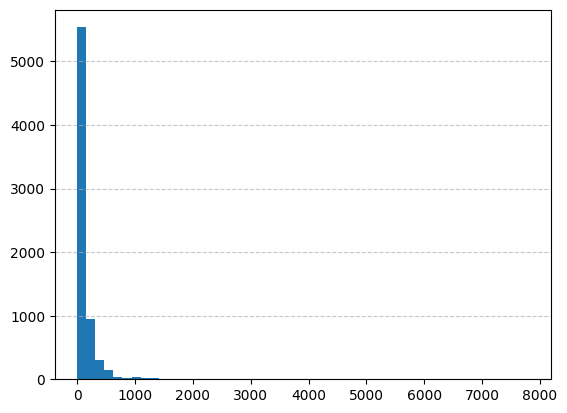

In [188]:
plt.hist(data['Population_density(People/sq km)'], bins=50,)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

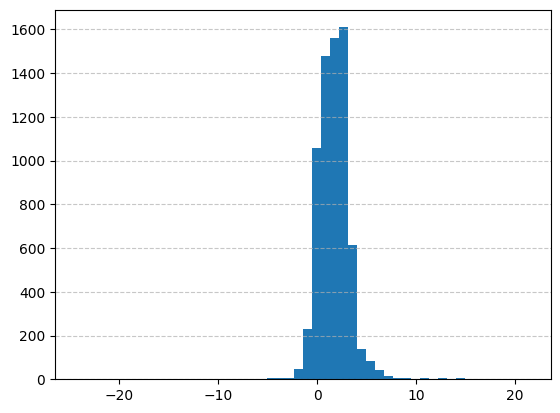

In [189]:
plt.hist(data['Population Growth (%)'], bins=50,)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [190]:
data['Population Growth (%)'].info()

<class 'pandas.core.series.Series'>
Index: 7127 entries, 16 to 7085
Series name: Population Growth (%)
Non-Null Count  Dtype  
--------------  -----  
6940 non-null   float64
dtypes: float64(1)
memory usage: 111.4 KB


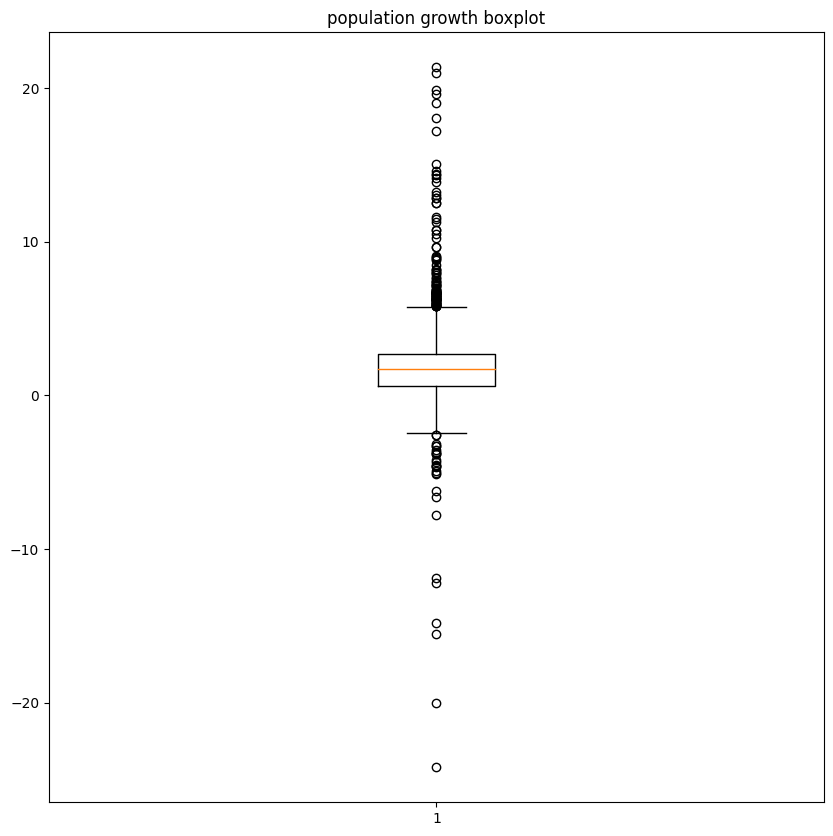

In [191]:
plt.figure(figsize=(10,10))
plt.boxplot(data['Population Growth (%)'].dropna())
plt.title("population growth boxplot")
plt.show()

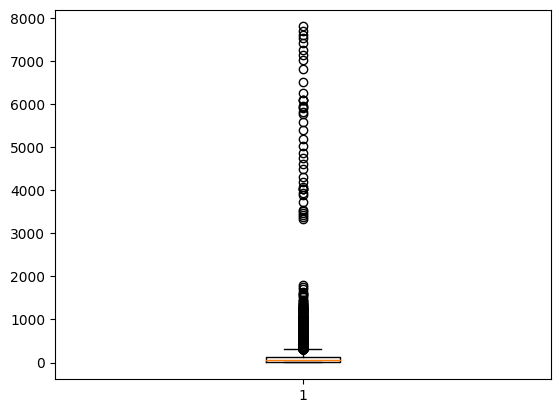

In [192]:
plt.boxplot(data['Population_density(People/sq km)'])
plt.show()

In [193]:
print(min(data['Population']), max(data['Population']))
print(min(data['Population_density(People/sq km)']), max(data['Population_density(People/sq km)']))
print(min(data['GDP_per_Capita']), max(data['GDP_per_Capita']))
print(min(data['Infant mortality per 1000 live births']), max(data['Population_density(People/sq km)']))

6381 1387790000
1.11194857172084 7798.724617524339
0.0024249251912713 123678.702143275
0.7359 7798.724617524339


In [194]:
print(min(data['Population_density(People/sq km)']), max(data['Population_density(People/sq km)']))

1.11194857172084 7798.724617524339


In [195]:
data['Population'] = np.log10(data['Population'])
data['GDP_per_Capita'] = np.log10(data['GDP_per_Capita'])
data['Infant mortality per 1000 live births'] = np.log10(data['Infant mortality per 1000 live births'])
data['Population_density(People/sq km)'] = np.log10(data['Population_density(People/sq km)'])

In [196]:
print(min(data['Population']), max(data['Population']))
print(min(data['Population_density(People/sq km)']), max(data['Population_density(People/sq km)']))
print(min(data['GDP_per_Capita']), max(data['GDP_per_Capita']))
print(min(data['Infant mortality per 1000 live births']), max(data['Population_density(People/sq km)']))

3.8048887446223913 9.14232375376929
0.04608470133385438 3.892023585144327
-2.6153016548015975 5.092294919208698
-0.13318119707395185 3.892023585144327


In [197]:
data.head()

,Country,Year,Young Age Dependency Ratio,Retirement Age Dependency Ratio,SDG Region,Population,Male Population Ratio,Urban Population Ratio,Total Area (sq km),GDP_per_Capita,Life Expectancy,Infant mortality per 1000 live births,BMI,BMI Female,BMI Male,Population Growth (%),Population_density(People/sq km)
16,Afghanistan,2000,103.586320,4.760314,Central and Southern Asia,7.290991,50.224894,22.078,652860.0,2.255727,55.298,1.964289,21.7,22.1,21.3,0.745280,1.476171
15,Afghanistan,2001,104.214788,4.775098,Central and Southern Asia,7.294216,50.259800,22.169,652860.0,2.155042,55.798,1.951782,21.8,22.2,21.4,6.661834,1.479395
14,Afghanistan,2002,104.555548,4.791609,Central and Southern Asia,7.322225,50.295587,22.261,652860.0,2.260486,56.454,1.938743,21.9,22.4,21.5,7.832638,1.507405
13,Afghanistan,2003,104.642984,4.804548,Central and Southern Asia,7.354975,50.330835,22.353,652860.0,2.300255,57.344,1.921230,22.0,22.5,21.6,4.011551,1.540155
12,Afghanistan,2004,104.480240,4.806580,Central and Southern Asia,7.372056,50.364915,22.500,652860.0,2.346021,57.944,1.906196,22.1,22.6,21.6,3.641234,1.557236


In [198]:
def remove_outliers(data, column, threshold=3):
    mean = data[column].mean()
    std_dev = data[column].std()
    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    print(len(outliers))
    data_cleaned = data[(data[column] <= upper_bound) & (data[column] >= lower_bound)]
    return data_cleaned

data = remove_outliers(data, "Population Growth (%)")
data.info()

74
<class 'pandas.core.frame.DataFrame'>
Index: 6866 entries, 16 to 7086
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                6866 non-null   object 
 1   Year                                   6866 non-null   int64  
 2   Young Age Dependency Ratio             6866 non-null   float64
 3   Retirement Age Dependency Ratio        6866 non-null   float64
 4   SDG Region                             6866 non-null   object 
 5   Population                             6866 non-null   float64
 6   Male Population Ratio                  6866 non-null   float64
 7   Urban Population Ratio                 6866 non-null   float64
 8   Total Area (sq km)                     6866 non-null   float64
 9   GDP_per_Capita                         6866 non-null   float64
 10  Life Expectancy                        6866 non-null   float64
 11  Infan

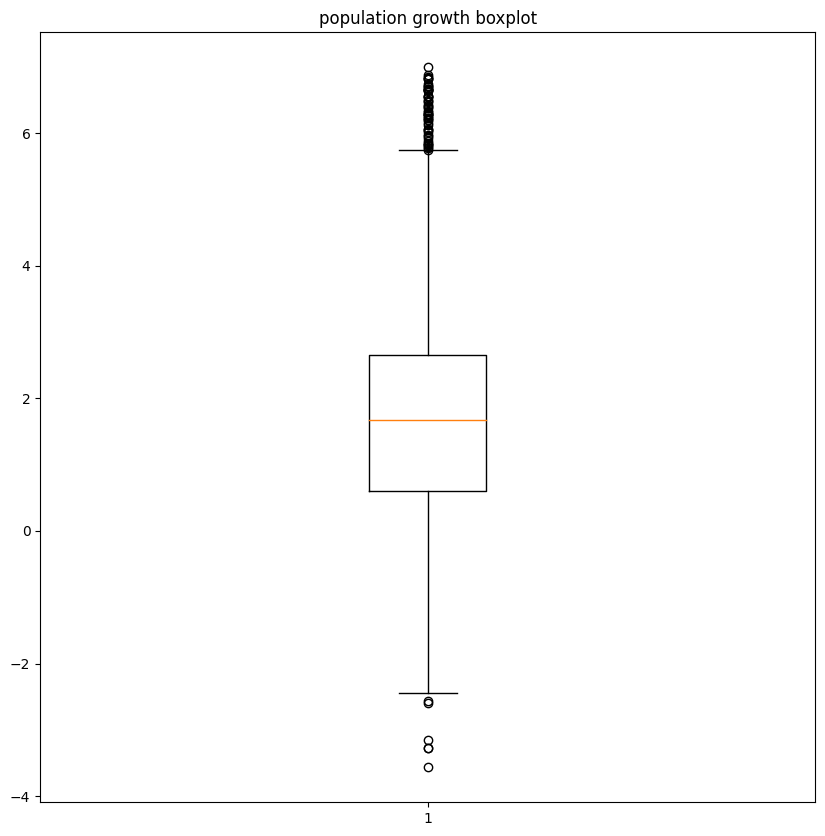

In [199]:
plt.figure(figsize=(10,10))
plt.boxplot(data['Population Growth (%)'].dropna())
plt.title("population growth boxplot")
plt.show()

In [200]:
data.drop('Country', inplace = True, axis=1)

In [201]:
data.drop('Total Area (sq km)', inplace=True, axis=1)

**Check for null values**

In [202]:
data.isnull().sum()


Year                                      0
Young Age Dependency Ratio                0
Retirement Age Dependency Ratio           0
SDG Region                                0
Population                                0
Male Population Ratio                     0
Urban Population Ratio                    0
GDP_per_Capita                            0
Life Expectancy                           0
Infant mortality per 1000 live births     0
BMI                                       0
BMI Female                               40
BMI Male                                 40
Population Growth (%)                     0
Population_density(People/sq km)          0
dtype: int64

**Replace bmi null values for bmi values**

In [203]:
data['BMI Female'].fillna(data['BMI'], inplace= True)
data['BMI Male'].fillna(data['BMI'], inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6866 entries, 16 to 7086
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   6866 non-null   int64  
 1   Young Age Dependency Ratio             6866 non-null   float64
 2   Retirement Age Dependency Ratio        6866 non-null   float64
 3   SDG Region                             6866 non-null   object 
 4   Population                             6866 non-null   float64
 5   Male Population Ratio                  6866 non-null   float64
 6   Urban Population Ratio                 6866 non-null   float64
 7   GDP_per_Capita                         6866 non-null   float64
 8   Life Expectancy                        6866 non-null   float64
 9   Infant mortality per 1000 live births  6866 non-null   float64
 10  BMI                                    6866 non-null   float64
 11  BMI Fema

In [204]:
data.dropna(subset='Population Growth (%)', inplace= True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6866 entries, 16 to 7086
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   6866 non-null   int64  
 1   Young Age Dependency Ratio             6866 non-null   float64
 2   Retirement Age Dependency Ratio        6866 non-null   float64
 3   SDG Region                             6866 non-null   object 
 4   Population                             6866 non-null   float64
 5   Male Population Ratio                  6866 non-null   float64
 6   Urban Population Ratio                 6866 non-null   float64
 7   GDP_per_Capita                         6866 non-null   float64
 8   Life Expectancy                        6866 non-null   float64
 9   Infant mortality per 1000 live births  6866 non-null   float64
 10  BMI                                    6866 non-null   float64
 11  BMI Fema

**One-hot encoding for SDG Region**

In [205]:
data = pd.get_dummies(data, columns=['SDG Region'], drop_first=True, dtype="float")

In [206]:
data.columns

Index(['Year', 'Young Age Dependency Ratio', 'Retirement Age Dependency Ratio',
       'Population', 'Male Population Ratio', 'Urban Population Ratio',
       'GDP_per_Capita', 'Life Expectancy',
       'Infant mortality per 1000 live births', 'BMI', 'BMI Female',
       'BMI Male', 'Population Growth (%)', 'Population_density(People/sq km)',
       'SDG Region_Central and Southern Asia',
       'SDG Region_Eastern and South-Eastern Asia',
       'SDG Region_Europe and Northern America',
       'SDG Region_Latin America and the Caribbean',
       'SDG Region_Northern Africa and Western Asia', 'SDG Region_Oceania',
       'SDG Region_Sub-Saharan Africa'],
      dtype='object')

**Use min_max Scaler for numericals data**

In [207]:
numerical_cols = ['Year', 'Young Age Dependency Ratio', 'Retirement Age Dependency Ratio',
       'Population', 'Male Population Ratio', 'Urban Population Ratio',
       'GDP_per_Capita', 'Life Expectancy',
       'Infant mortality per 1000 live births', 'BMI', 'BMI Female',
       'BMI Male', 'Population_density(People/sq km)']

scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [208]:
data.head()

,Year,Young Age Dependency Ratio,Retirement Age Dependency Ratio,Population,Male Population Ratio,Urban Population Ratio,GDP_per_Capita,Life Expectancy,Infant mortality per 1000 live births,BMI,...,BMI Male,Population Growth (%),Population_density(People/sq km),SDG Region_Central and Southern Asia,SDG Region_Eastern and South-Eastern Asia,SDG Region_Europe and Northern America,SDG Region_Latin America and the Caribbean,SDG Region_Northern Africa and Western Asia,SDG Region_Oceania,SDG Region_Sub-Saharan Africa
16,0.625,0.890247,0.100566,0.653447,0.151130,0.192309,0.631978,0.495486,0.822179,0.259259,...,0.235669,0.745280,0.372389,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.650,0.896633,0.100893,0.654051,0.152253,0.193252,0.618915,0.504339,0.817139,0.265432,...,0.242038,6.661834,0.373228,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.700,0.900983,0.101542,0.665440,0.154539,0.195159,0.637755,0.531710,0.804828,0.277778,...,0.254777,4.011551,0.389050,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.725,0.899330,0.101587,0.668642,0.155636,0.196683,0.643693,0.542333,0.798771,0.283951,...,0.254777,3.641234,0.393498,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.750,0.886145,0.101044,0.671553,0.156615,0.198787,0.651349,0.549716,0.793116,0.290123,...,0.261146,4.226557,0.397543,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualize data correlation

In [209]:
data.corr()

,Year,Young Age Dependency Ratio,Retirement Age Dependency Ratio,Population,Male Population Ratio,Urban Population Ratio,GDP_per_Capita,Life Expectancy,Infant mortality per 1000 live births,BMI,...,BMI Male,Population Growth (%),Population_density(People/sq km),SDG Region_Central and Southern Asia,SDG Region_Eastern and South-Eastern Asia,SDG Region_Europe and Northern America,SDG Region_Latin America and the Caribbean,SDG Region_Northern Africa and Western Asia,SDG Region_Oceania,SDG Region_Sub-Saharan Africa
Year,1.000000,-0.346932,0.143803,0.095731,-0.046847,0.169012,0.317147,0.314382,-0.361919,0.392534,...,0.387984,-0.208870,0.122470,0.027568,-0.003581,0.065507,-0.026900,-0.013598,-0.024640,-0.022289
Young Age Dependency Ratio,-0.346932,1.000000,-0.739123,-0.110874,0.056273,-0.648483,-0.749706,-0.807425,0.866775,-0.533023,...,-0.620676,0.646776,-0.265124,0.051284,-0.093356,-0.633013,-0.036708,0.006842,0.144700,0.578127
Retirement Age Dependency Ratio,0.143803,-0.739123,1.000000,0.112503,-0.396609,0.474752,0.607086,0.618286,-0.752861,0.308247,...,0.429296,-0.648562,0.170608,-0.136123,-0.083714,0.811981,-0.042472,-0.176694,-0.172762,-0.369282
Population,0.095731,-0.110874,0.112503,1.000000,-0.125756,0.039192,-0.057774,0.002251,0.007801,-0.328141,...,-0.255285,0.027931,-0.038362,0.158143,0.214402,0.145350,-0.166703,0.064069,-0.453634,-0.008641
Male Population Ratio,-0.046847,0.056273,-0.396609,-0.125756,1.000000,0.144213,0.125748,0.067398,0.027144,0.115758,...,0.099373,0.418235,-0.004266,0.076782,0.035845,-0.266946,-0.067553,0.408924,0.119897,-0.129608
Urban Population Ratio,0.169012,-0.648483,0.474752,0.039192,0.144213,1.000000,0.754665,0.679240,-0.683377,0.590409,...,0.645915,-0.272798,0.047366,-0.222578,-0.038396,0.402785,0.111904,0.223594,-0.150110,-0.433238
GDP_per_Capita,0.317147,-0.749706,0.607086,-0.057774,0.125748,0.754665,1.000000,0.795068,-0.856004,0.629020,...,0.684035,-0.345716,0.116244,-0.194021,-0.048496,0.500862,0.078342,0.102177,-0.066835,-0.455819
Life Expectancy,0.314382,-0.807425,0.618286,0.002251,0.067398,0.679240,0.795068,1.000000,-0.909914,0.649317,...,0.711045,-0.473823,0.262183,-0.056650,0.060534,0.478432,0.172665,0.125242,-0.031117,-0.700416
Infant mortality per 1000 live births,-0.361919,0.866775,-0.752861,0.007801,0.027144,-0.683377,-0.856004,-0.909914,1.000000,-0.608167,...,-0.695352,0.541804,-0.243321,0.150727,-0.044548,-0.628720,-0.033401,-0.016670,0.041206,0.566053
BMI,0.392534,-0.533023,0.308247,-0.328141,0.115758,0.590409,0.629020,0.649317,-0.608167,1.000000,...,0.968151,-0.384572,0.137449,-0.179249,-0.242110,0.261563,0.179681,0.217827,0.367608,-0.527507


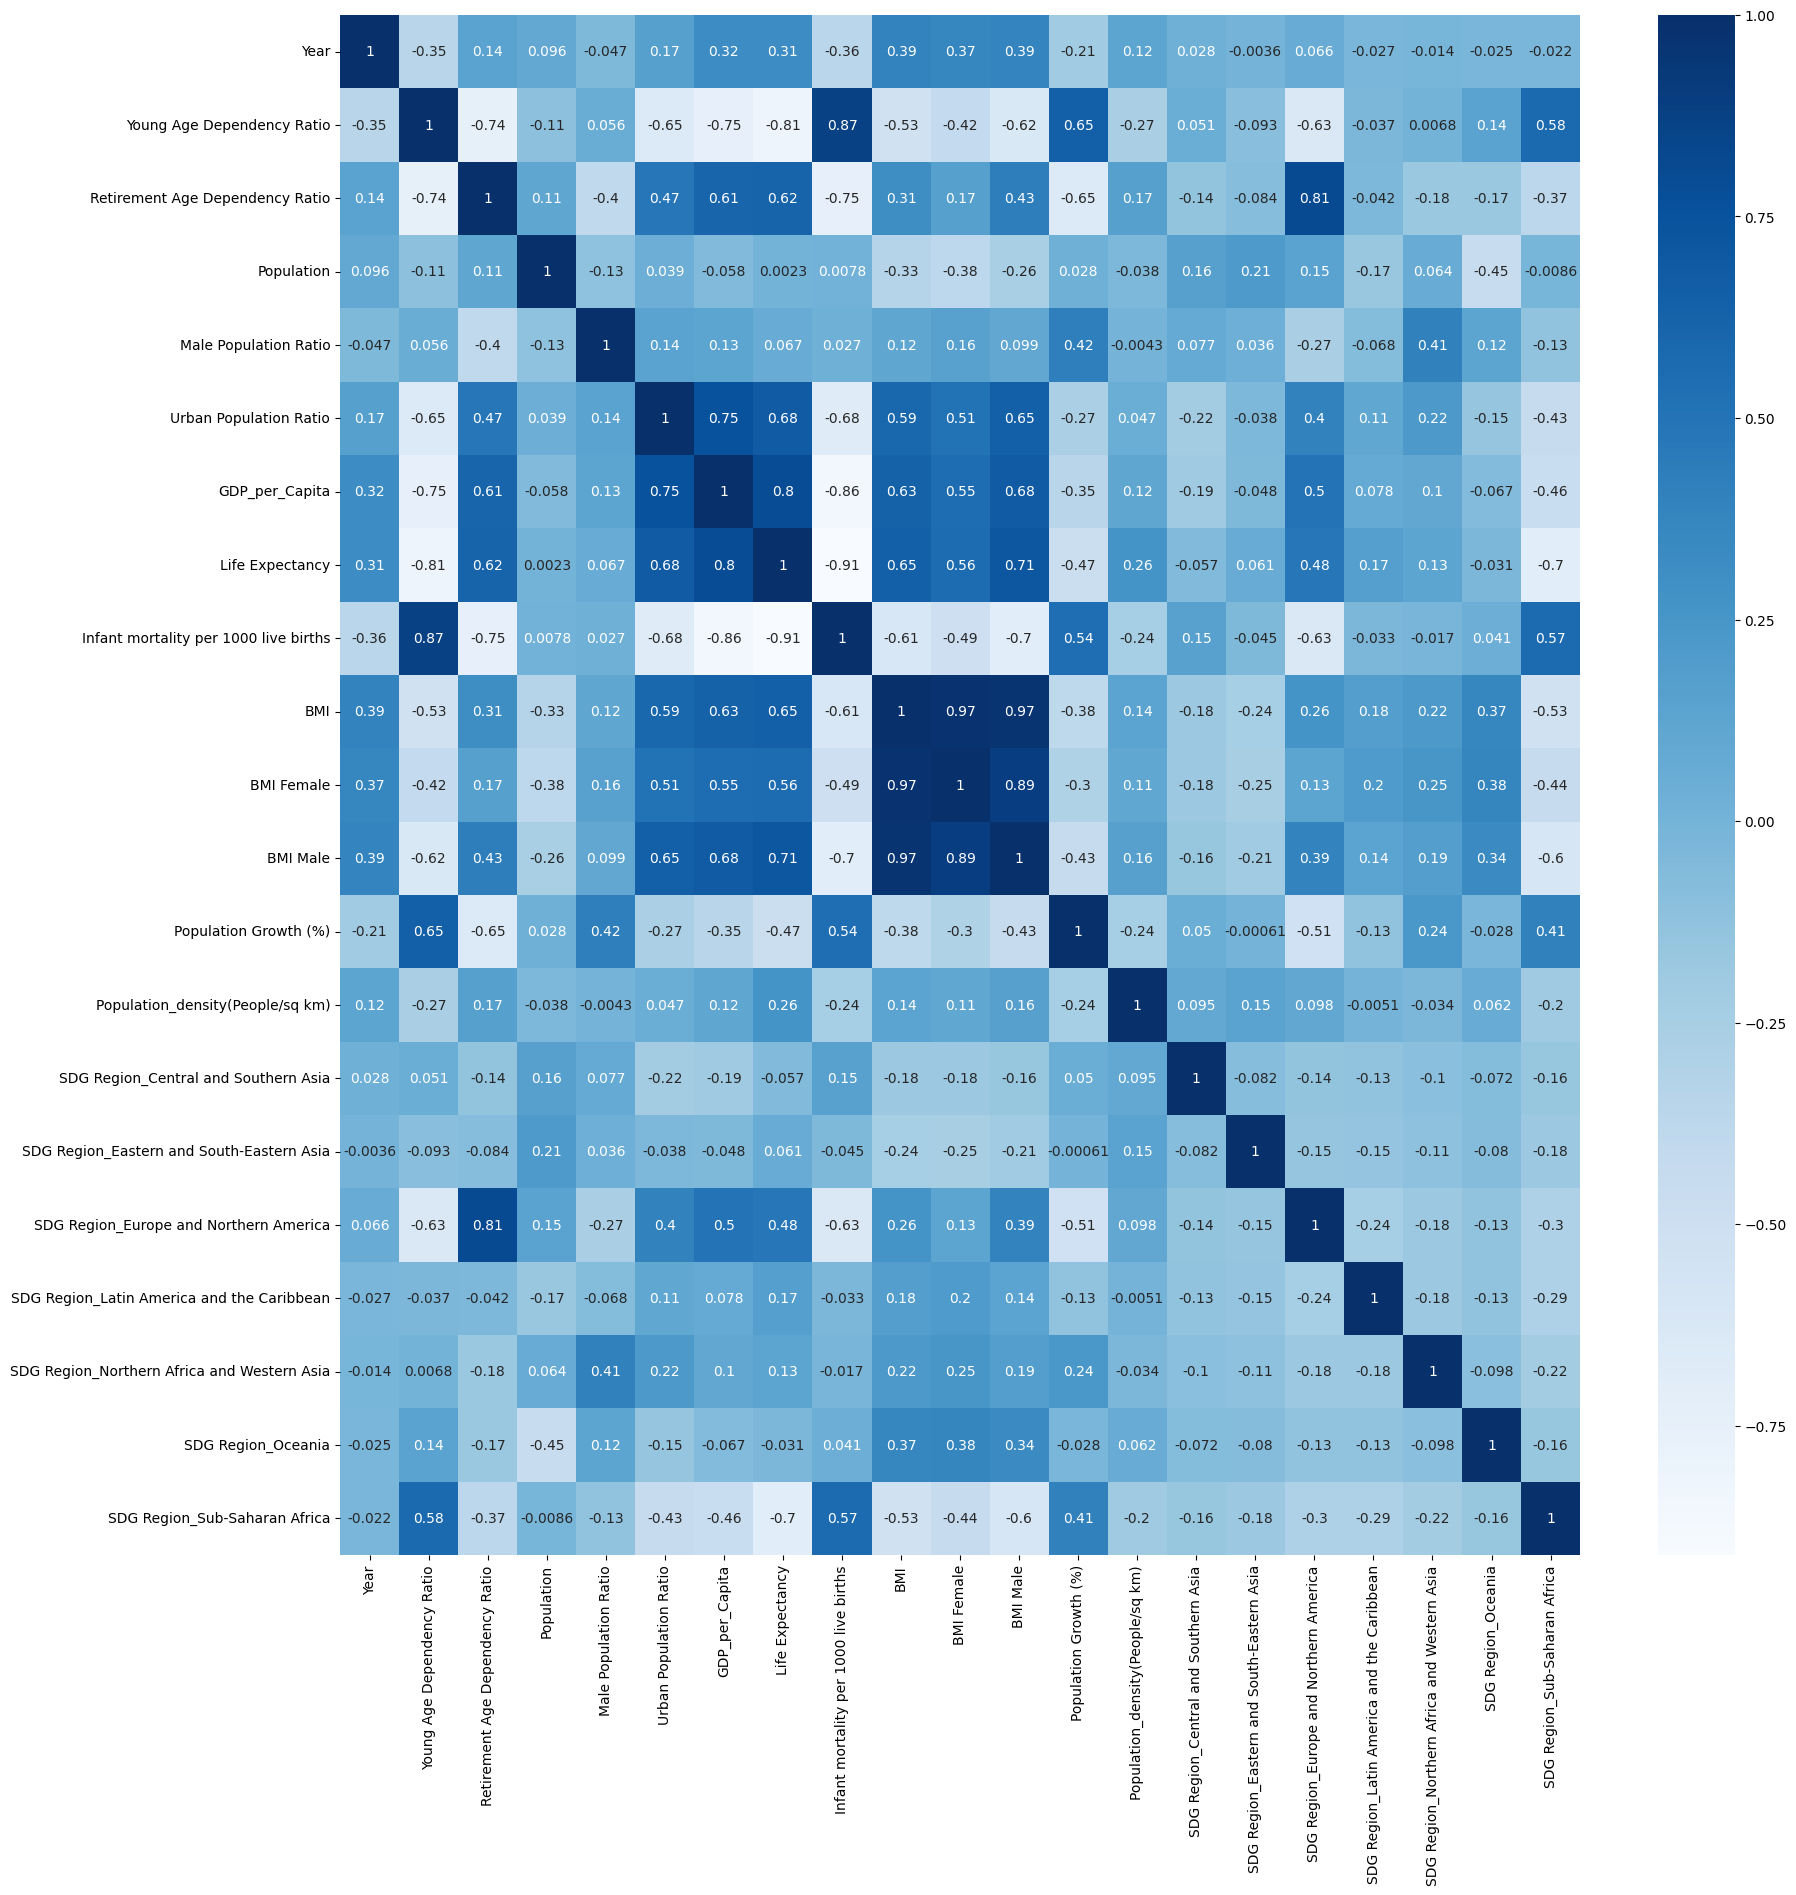

In [210]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.show()

In [211]:
corr_matrix = data.corr()

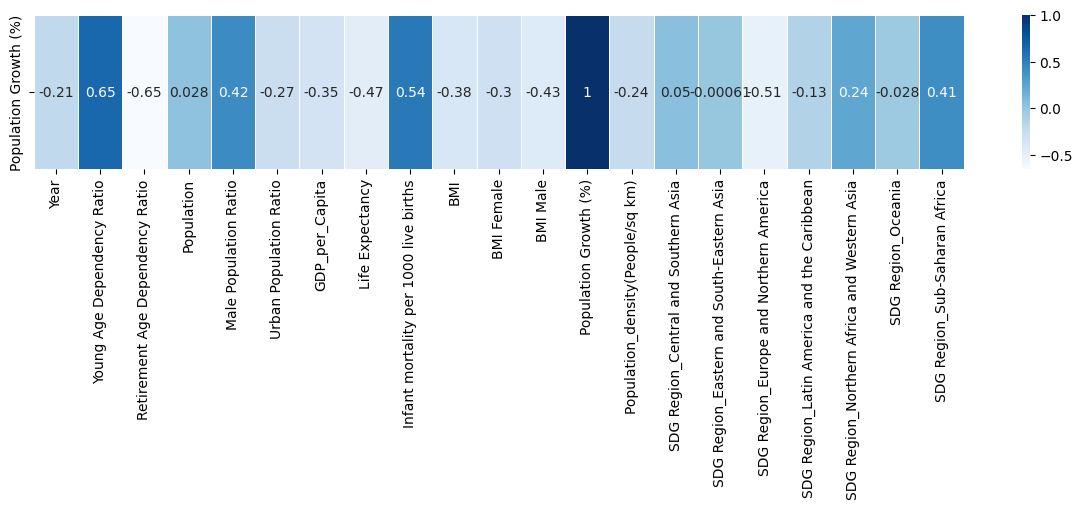

In [212]:
plt.figure(figsize=(15, 2))
sns.heatmap(corr_matrix[["Population Growth (%)"]].T, annot=True, cmap='Blues', linewidths=0.5)
plt.show()

# Train, test dataset split

In [213]:
X = data.drop(['Population Growth (%)'], axis=1)
y = data['Population Growth (%)']


In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Evaluation function

In [215]:
def performance(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    rmse = mse ** 0.5
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared (R²): {r2}')


# Plotting result function

In [216]:
def pred_test_result(y_test,y_pred):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel('Actual population growth')
    plt.ylabel('Predicted population growth')
    plt.title('Actual vs Predicted population growth')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.grid(True)
    plt.show()

In [217]:
def residual_pred_result(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted population growth')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted population growth')
    plt.grid(True)
    plt.show()


# Linear Regression

In [218]:
def OLS_model(X_train, y_train, X_test):
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()
    print(result.summary())
    X_test = sm.add_constant(X_test)
    joblib.dump(model, 'population_linear.pkl')
    return result.predict(X_test)

                              OLS Regression Results                             
Dep. Variable:     Population Growth (%)   R-squared:                       0.663
Model:                               OLS   Adj. R-squared:                  0.662
Method:                    Least Squares   F-statistic:                     538.8
Date:                   Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                           23:20:14   Log-Likelihood:                -6594.6
No. Observations:                   5492   AIC:                         1.323e+04
Df Residuals:                       5471   BIC:                         1.337e+04
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

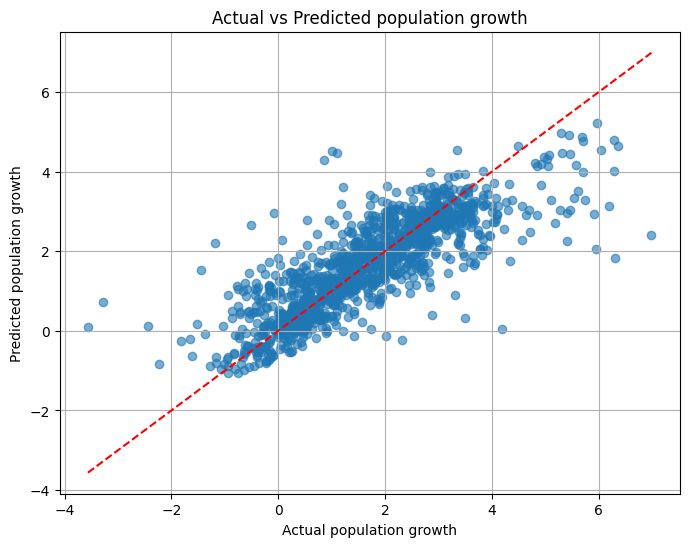

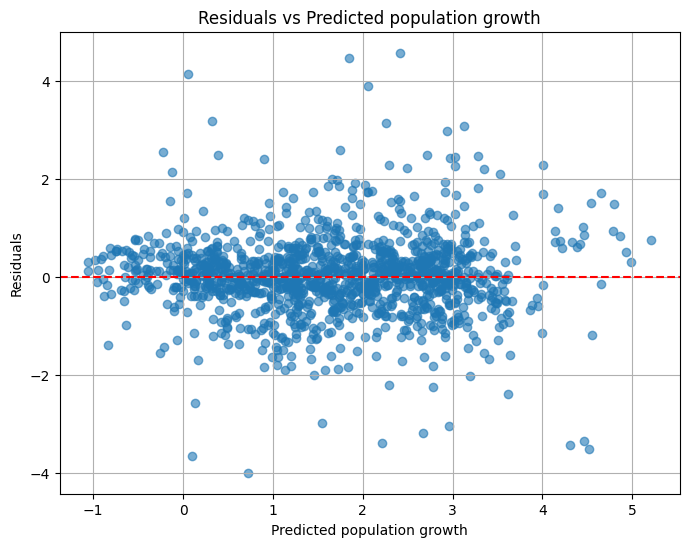

In [219]:
y_pred = OLS_model(X_train, y_train, X_test)
performance(y_test, y_pred)
pred_test_result(y_test, y_pred)
residual_pred_result(y_test, y_pred)

# Ridge Regression

In [220]:
ridge = Ridge()
param_grid = {'alpha': np.logspace(-6, 6, 13)}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

0.001


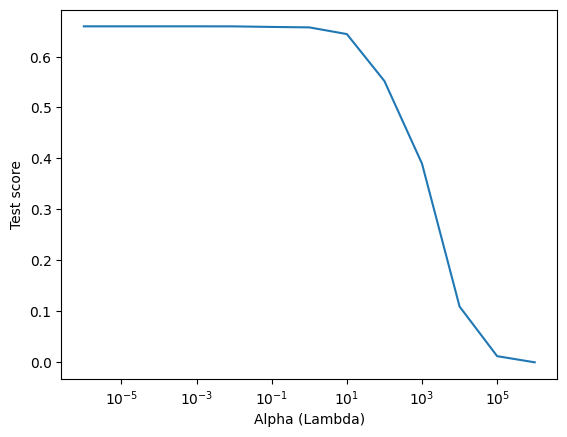

In [221]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import validation_curve

ridge = Ridge()
alphas = np.logspace(-6, 6, 13)
train_scores, test_scores = validation_curve(ridge, X_train,y_train, param_name="alpha", param_range=alphas, cv=5)

import matplotlib.pyplot as plt
plt.semilogx(alphas, np.mean(test_scores, axis=1))
plt.xlabel("Alpha (Lambda)")
plt.ylabel("Test score")
plt.show()

In [222]:
def ridge_regression(X_train, y_train, X_test):
    ridge = Ridge(alpha=0.1)
    ridge.fit(X_train, y_train)
    return ridge.predict(X_test)    

Mean Absolute Error (MAE): 0.5390560030979066
Mean Squared Error (MSE): 0.6367255138782346
Root Mean Squared Error (RMSE): 0.7979508217166235
R-squared (R²): 0.6772916163170946


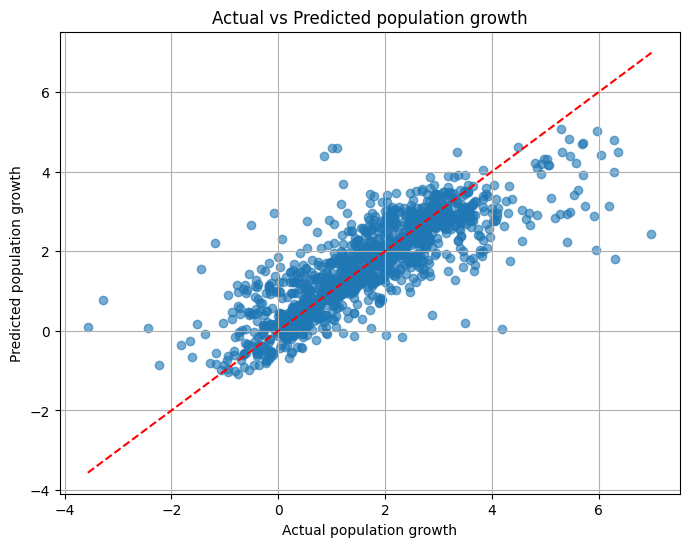

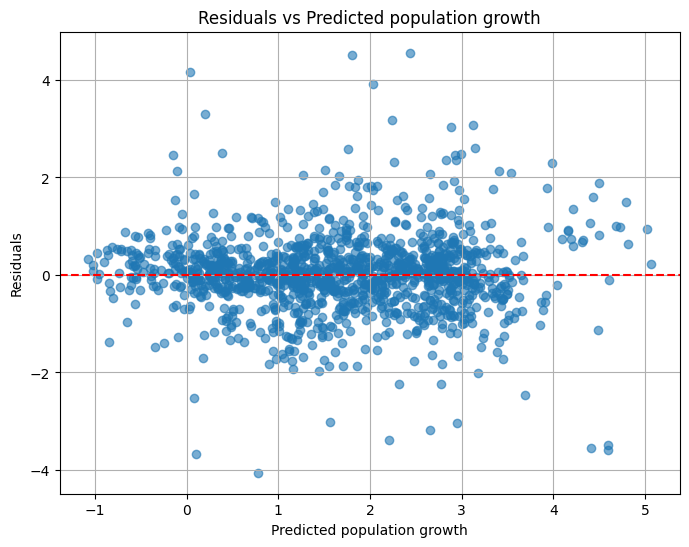

In [223]:
y_pred_ridge = ridge_regression(X_train, y_train, X_test)
performance(y_test, y_pred_ridge)
pred_test_result(y_test,y_pred_ridge)
residual_pred_result(y_test,y_pred_ridge)

# Lasso Regression

In [224]:
ridge = Lasso()
param_grid = {'alpha': np.logspace(-6, 6, 13)}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.431e+03, tolerance: 8.519e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+03, tolerance: 8.553e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

1e-06


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+03, tolerance: 1.054e+00
  model = cd_fast.enet_coordinate_descent(


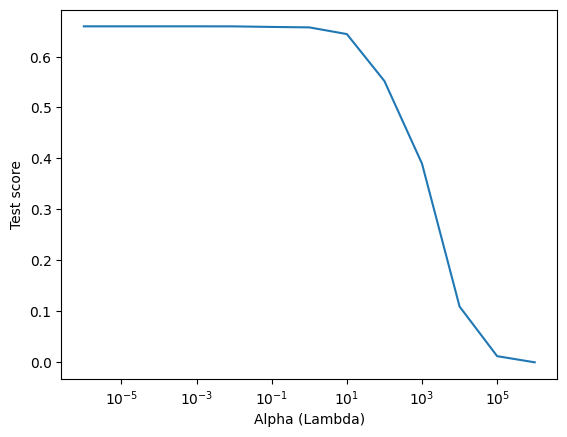

In [225]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import validation_curve

ridge = Ridge()
alphas = np.logspace(-6, 6, 13)
train_scores, test_scores = validation_curve(ridge, X_train,y_train, param_name="alpha", param_range=alphas, cv=5)

import matplotlib.pyplot as plt
plt.semilogx(alphas, np.mean(test_scores, axis=1))
plt.xlabel("Alpha (Lambda)")
plt.ylabel("Test score")
plt.show()

In [226]:
def lasso_regression(X_train, y_train, X_test):
    lasso = Lasso(alpha=1e-06)
    lasso.fit(X_train, y_train)
    return lasso.predict(X_test)

In [227]:
y_pred_lasso = lasso_regression(X_train, y_train, X_test)
performance(y_test, y_pred_lasso)

Mean Absolute Error (MAE): 0.5390138471205914
Mean Squared Error (MSE): 0.6357884974892186
Root Mean Squared Error (RMSE): 0.7973634663622473
R-squared (R²): 0.6777665196118313


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+03, tolerance: 1.054e+00
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error (MAE): 0.5390138471205914
Mean Squared Error (MSE): 0.6357884974892186
Root Mean Squared Error (RMSE): 0.7973634663622473
R-squared (R²): 0.6777665196118313


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+03, tolerance: 1.054e+00
  model = cd_fast.enet_coordinate_descent(


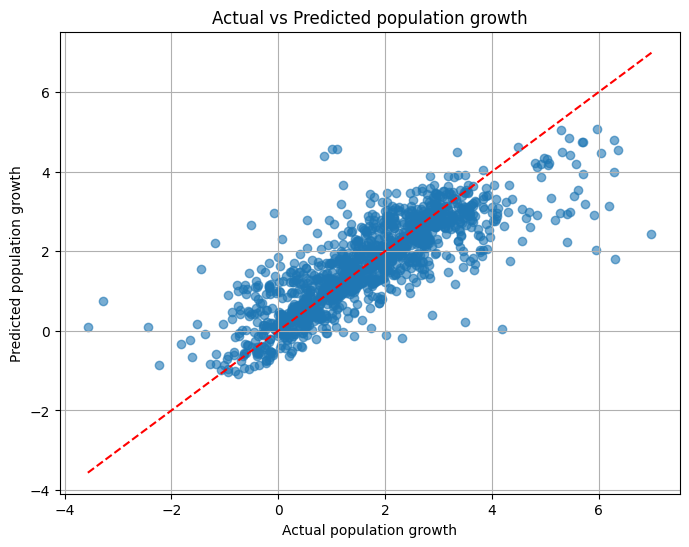

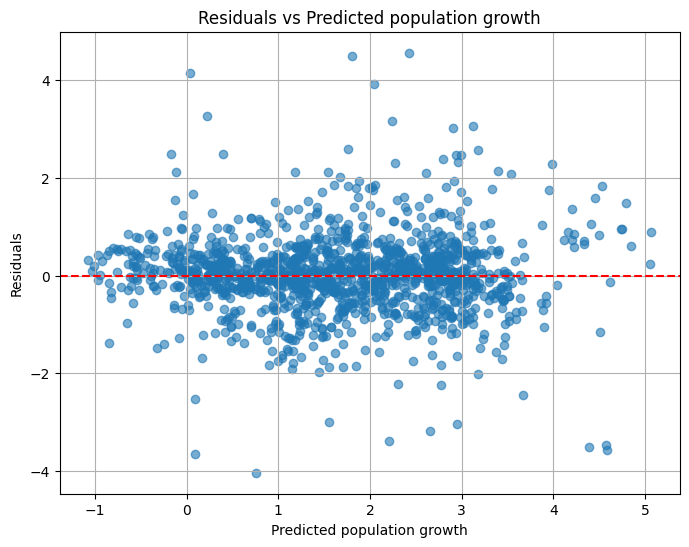

In [228]:
y_pred_lasso = lasso_regression(X_train, y_train, X_test)
performance(y_test, y_pred_lasso)
pred_test_result(y_test,y_pred_lasso)
residual_pred_result(y_test,y_pred_lasso)